In [26]:
using PyPlot
using StatsBase

include("modgen_linearSDE.jl")
include("C:\\Users\\JaredMcBride\\Desktop\\Git Stuff\\Server_scripts\\Model_Reduction_Dev.jl")

vector_wiener_filter_fft

In [27]:
F = [0.99 10; 0 0.999] # Must be stable
G = [1 0; 0 1]
R = [1 0; 0 1]
Xo = [1; 1]
t_disc = 1000
gap = 1

t_start = 0
t_stop = 1e6
h = 1

X = modgen_LSSM(t_start,t_stop,h,
    F = F, 
    G = G, 
    R = R, 
    Xo = Xo, 
    t_disc = t_disc, 
    gap = gap)


2×999000 Array{Float64,2}:
 14913.4     15001.8     15082.9     …  12349.9     12340.4      0.0
    23.3732     23.3155     23.1647        11.0552      9.91064  0.0

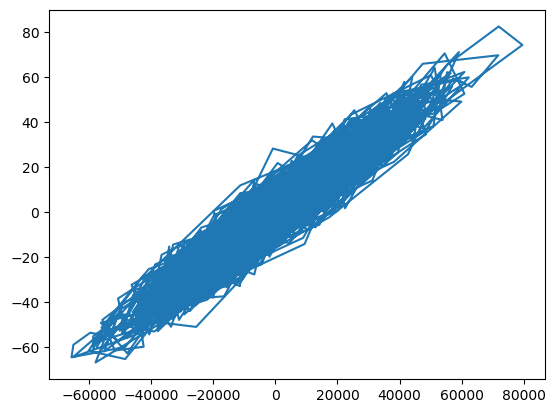

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003B654608>

In [28]:
plot(X[1,1:200:end],X[2,1:200:end])

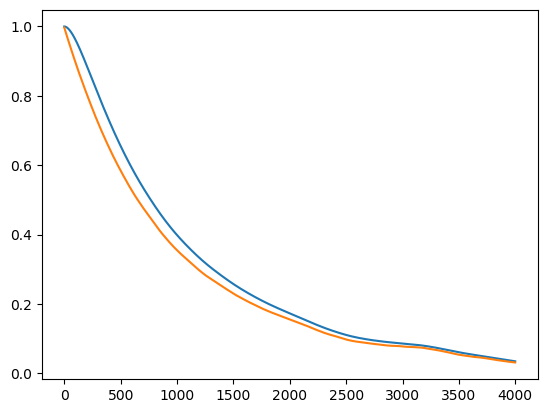

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000422D9F48>

In [29]:
A1 = autocor(X[1,:],1:4000)
A2 = autocor(X[2,:],1:4000)
plot(A1)
plot(A2)

In [59]:
spect_ana_fun(z) = ((I - z^(-1)*F)\R)/(I - z*F')

nfft = size(spect_num,3)
Θ = 2π*im*(0:nfft-1)/nfft
Z = exp.(Θ)
spect_Ana = complex(zeros(2,2,nfft))
for i = 1:nfft
    spect_Ana[:,:,i] = spect_ana_fun(Z[i])
end

In [70]:
spect_num = z_crossspect_fft(
    X,
    X::Array{T,2} where T <: Number;
    nfft = 0,
    n = 4,
    p = 700,
    win = "Par")

adjusted no. of steps from 999000 to 1000000


2×2×1000000 Array{Complex,3}:
[:, :, 1] =
 1.85654e11-2.43989e-6im  1.8563e8+13853.1im
   1.8563e8-13853.1im     191876.0-5.80669e-12im

[:, :, 2] =
 1.85654e11+1.60229e-5im  1.8563e8+1.38091e-8im
   1.8563e8-1.43859e-9im  191876.0+1.47345e-11im

[:, :, 3] =
 1.85654e11-2.71045e-7im  1.8563e8-13853.1im
   1.8563e8+13853.1im     191876.0-5.52273e-12im

...

[:, :, 999998] =
 1.85652e11+5.84161e-6im  1.85629e8+55412.1im
  1.85629e8-55412.1im      191874.0+3.64828e-12im

[:, :, 999999] =
 1.85653e11+5.87299e-6im  1.85629e8+41559.2im
  1.85629e8-41559.2im      191875.0+1.59185e-12im

[:, :, 1000000] =
 1.85654e11+4.78942e-6im  1.8563e8+27706.2im
   1.8563e8-27706.2im     191876.0+5.24989e-12im

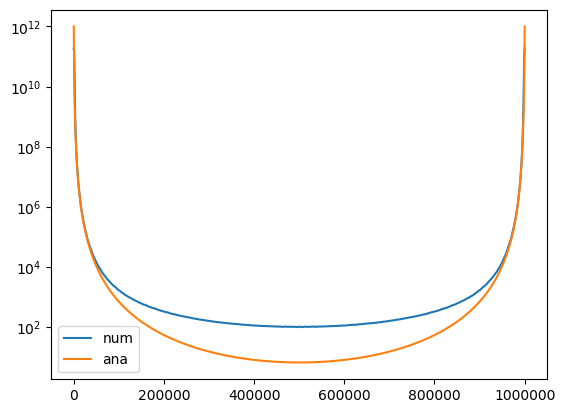

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


PyObject <matplotlib.legend.Legend object at 0x000000006278E908>

In [71]:
semilogy(abs.(spect_num[1,1,:]), label = "num")
semilogy( abs.(spect_Ana[1,1,:]),label = "ana")
legend()

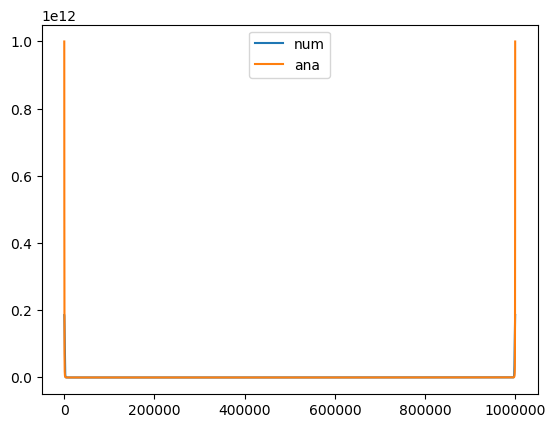

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


PyObject <matplotlib.legend.Legend object at 0x00000000595F3FC8>

In [72]:
plot(abs.(spect_num[1,1,:]), label = "num")
plot( abs.(spect_Ana[1,1,:]),label = "ana")
legend()